In [1]:
from mido import MidiFile
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

proj_base_path = '../../../'
sys.path.append(os.path.join(os.getcwd(), proj_base_path))

dataset_path = os.path.join(proj_base_path, 'datasets')

from src.data_processing.sparse_notes_classified_time.mid2np import mid2np, remove_subsequents_and_count_note_ticks 

In [2]:
mids_dir = os.path.join(dataset_path, 'midi/pokemon/')

mid_paths = [os.path.join(mids_dir, p) for p in os.listdir(mids_dir)]
mids = [MidiFile(p) for p in mid_paths]
for m in mids: print(m)

<midi file '../../../datasets/midi/pokemon/Pokemon_-_Pallet_Town.mid' type 0, 1 tracks, 1366 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_GoldSilverCrystal_-_Indigo_Plateau.mid' type 0, 1 tracks, 1276 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Littleroot_Town.mid' type 0, 1 tracks, 1123 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Route_104.mid' type 0, 1 tracks, 583 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_DiamondPearlPlatinum_-_Torn_WorldDistortion_World.mid' type 0, 1 tracks, 1294 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Slateport_City.mid' type 0, 1 tracks, 2449 messages>
<midi file '../../../datasets/midi/pokemon/pokemon3.mid' type 0, 1 tracks, 1015 messages>
<midi file '../../../datasets/midi/pokemon/Pokemon_BlackWhite_-_An_Unwavering_Heart.mid' type 0, 1 tracks, 1055 messages>
<midi file '../../../datasets/midi/pokemon/Pokemo

In [3]:
# durations = [mid2np(m)[1] for m in mids]
durations = []
for m in mids:
    durations.append(mid2np(m)[1])
    print(f'finished: {m}')

for d in durations: print(d.size, d.max())
durations = np.concatenate(durations)
durations.shape

finished: <midi file '../../../datasets/midi/pokemon/Pokemon_-_Pallet_Town.mid' type 0, 1 tracks, 1366 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_GoldSilverCrystal_-_Indigo_Plateau.mid' type 0, 1 tracks, 1276 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Littleroot_Town.mid' type 0, 1 tracks, 1123 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Route_104.mid' type 0, 1 tracks, 583 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_DiamondPearlPlatinum_-_Torn_WorldDistortion_World.mid' type 0, 1 tracks, 1294 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_RubySapphireEmerald_-_Slateport_City.mid' type 0, 1 tracks, 2449 messages>
finished: <midi file '../../../datasets/midi/pokemon/pokemon3.mid' type 0, 1 tracks, 1015 messages>
finished: <midi file '../../../datasets/midi/pokemon/Pokemon_BlackWhite_-_An_Unwavering_Heart.mid' ty

(4608,)

In [4]:
durations.min(), durations.max()

(0.01, 11.01)

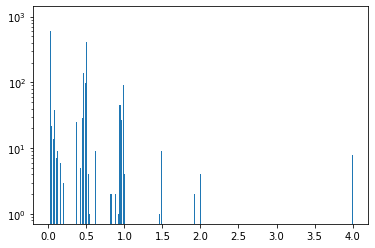

In [8]:
import matplotlib.pyplot as plt

plt.hist(durations, bins=1000, range=(0, 4), log=True)
plt.show()

In [10]:
from sklearn.cluster import DBSCAN, KMeans

# db = DBSCAN(eps=0.03).fit(durations.reshape(-1, 1))
db = KMeans(n_clusters=24).fit(durations.reshape(-1, 1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
label: 0    count: 2023, min:    0.01, max:    0.05, avg:    0.02, std:    0.01, med:    0.02
label: 1    count:   17, min:    1.68, max:    1.86, avg:    1.83, std:    0.06, med:    1.85
label: 2    count:    3, min:    4.49, max:    4.53, avg:    4.52, std:    0.02, med:    4.53
label: 3    count:  561, min:    0.49, max:    0.62, avg:    0.50, std:    0.02, med:    0.50
label: 4    count:    3, min:    8.98, max:    8.99, avg:    8.99, std:    0.00, med:    8.99
label: 5    count:  439, min:    0.88, max:    1.02, avg:    0.98, std:    0.03, med:    0.98
label: 6    count:   15, min:    2.97, max:    3.01, avg:    2.99, std:    0.02, med:    3.00
label: 7    count:    3, min:    5.98, max:    6.02, avg:    5.99, std:    0.02, med:    5.98
label: 8    count:   70, min:    1.46, max:    1.52, avg:    1.48, std:    0.01, med:    1.48
label: 9    count:  223, min:    0.18, max:    0.30, avg:    0.23, std:    0.02,

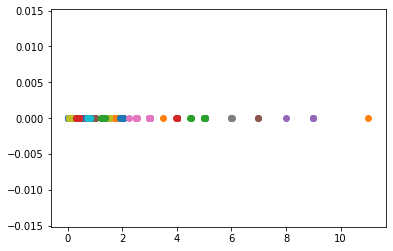

In [11]:
print(np.unique(db.labels_))

for label in np.unique(db.labels_):
    X = durations[db.labels_ == label]
    Y = np.zeros_like(X)
    
    print(f'label: {label: <4} count: {X.size: >4}, min: {X.min():7.2f}, max: {X.max():7.2f}, avg: {X.mean():7.2f}, std: {X.std():7.2f}, med: {np.median(X):7.2f}')
    
    plt.scatter(X, Y)
    
plt.show()

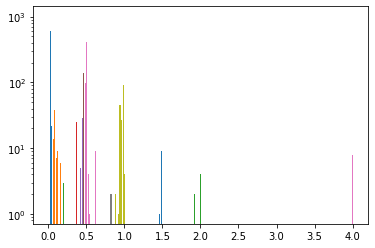

In [20]:
for X in sorted([durations[db.labels_ == label] for label in np.unique(db.labels_)], key=lambda x: x.mean()):
    plt.hist(X, bins=1000, range=(0, 4), log=True)
    
plt.show()

In [24]:
db.predict(durations.reshape(-1, 1))

array([20,  2, 20, ...,  2, 20, 17], dtype=int32)